In [4]:
import numpy as np
# from keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import datasets, layers, models

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [33]:
# (x_train_load, y_train_load), (x_test_load, y_test_load) = datasets.cifar10.load_data()
(x_train_load, y_train_load), (x_test_load, y_test_load) = cifar10.load_data()

# 處理數據
x_train_load = x_train_load[:500]
y_train_load = y_train_load[:500]

x_test_load = x_test_load[:20]
y_test_load = y_test_load[:20]

print(x_test_load.shape)
print(y_test_load)

(20, 32, 32, 3)
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]]


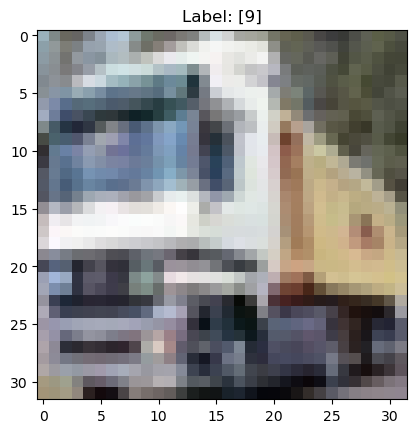

In [28]:
plt.imshow(x_train_load[1])
plt.title(f'Label: {y_train_load[1]}')
plt.show()

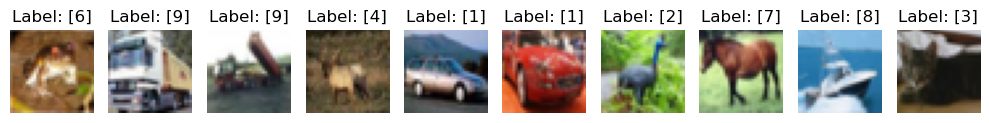

In [32]:
# 使用 matplotlib 顯示多張圖像
# 設置圖像數量
num_images = 10

# 創建一個圖形和一組子圖
fig, axes = plt.subplots(1, num_images, figsize=(10, 10))

for i, ax in enumerate(axes):
    # 顯示第 i 張圖像
    ax.imshow(x_train_load[i])
    ax.set_title(f'Label: {y_train_load[i]}')
    ax.axis('off')  # 不顯示軸

plt.tight_layout()
plt.show()

In [12]:
# Data normalization

# x_train = x_train_load.reshape((x_train_load.shape[0], 28, 28, 1)).astype('float32') / 255     # ==> 39s
# x_test = x_test_load.reshape((x_test_load.shape[0], 28, 28, 1)).astype('float32') / 255
x_train = x_train_load.reshape((x_train_load.shape[0], 32, 32, 3))                        # ==> 37s  43
x_test = x_test_load.reshape((x_test_load.shape[0], 32, 32, 3))

# 將標籤轉換為 one-hot 編碼
y_train = to_categorical(y_train_load)
y_test = to_categorical(y_test_load)
print(x_train.shape)


(500, 32, 32, 3)


In [132]:

# # # 建立一個ImageDataGenerator實例
# datagen = ImageDataGenerator(rescale=1./255)

# # # 使用.flow_from_directory()方法從目錄中載入圖像
# train_generator = datagen.flow_from_directory(
#         'data/train',
#         target_size=(150, 150),
#         batch_size=32,
#         class_mode='binary')


In [142]:
from keras.preprocessing.image import ImageDataGenerator
# 創建圖像數據生成器
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # 隨機旋轉的角度範圍
    zoom_range=0.1,  # 隨機縮放的範圍
    width_shift_range=0.1,  # 水平移動的範圍
    height_shift_range=0.1  # 垂直移動的範圍
)

# 適用生成器於訓練數據
train_generator = train_datagen.flow(x_train, y_train)

# ....

# history = model.fit(train_generator, epochs=50, batch_size=64, validation_data=(x_test, y_test))


In [13]:
# 建立模型
import time
start_time = time.time()

model = Sequential()
model.add(Lambda(lambda x: x / 255))     ##==>14s
model.add(Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 訓練模型
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))
# history = model.fit(train_generator, epochs=50, batch_size=64, validation_data=(x_test, y_test))
end_time = time.time()
print(f"Training took {end_time - start_time} seconds")


Epoch 1/50
8/8 [==============================] - 4s 171ms/step - loss: 2.3031 - accuracy: 0.1200 - val_loss: 2.3058 - val_accuracy: 0.1000
Epoch 2/50
8/8 [==============================] - 1s 119ms/step - loss: 2.2909 - accuracy: 0.1320 - val_loss: 2.3017 - val_accuracy: 0.1000
Epoch 3/50
8/8 [==============================] - 1s 67ms/step - loss: 2.2830 - accuracy: 0.1300 - val_loss: 2.2968 - val_accuracy: 0.1000
Epoch 4/50
8/8 [==============================] - 0s 51ms/step - loss: 2.2735 - accuracy: 0.1300 - val_loss: 2.2767 - val_accuracy: 0.1000
Epoch 5/50
8/8 [==============================] - 1s 129ms/step - loss: 2.2599 - accuracy: 0.1300 - val_loss: 2.2676 - val_accuracy: 0.1000
Epoch 6/50
8/8 [==============================] - 1s 102ms/step - loss: 2.2390 - accuracy: 0.1400 - val_loss: 2.2389 - val_accuracy: 0.1000
Epoch 7/50
8/8 [==============================] - 1s 134ms/step - loss: 2.2170 - accuracy: 0.1940 - val_loss: 2.1989 - val_accuracy: 0.2000
Epoch 8/50
8/8 [======

In [16]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_train)
y_pred_label = np.argmax(y_pred, axis=1)
y_train_label = np.argmax(y_train, axis=1)
cm = confusion_matrix(y_train_label, y_pred_label)

# 打印混淆矩陣
print("Confusion Matrix:")
print(cm)

16/16 [==============================] - 1s 8ms/step
Confusion Matrix:
[[32  6  0  2  1  0  0  1  9  0]
 [ 1 56  0  1  1  0  2  0  2  2]
 [ 2  2 19  5  7  5  1  1  1  0]
 [ 3  2  2 20  5  2  5  3  0  5]
 [ 1  1  3  3 27  2  9  2  2  0]
 [ 0  0  4  2  9 13  6  4  0  2]
 [ 0  1  2  0  2  0 43  3  0  2]
 [ 2  2  0  2  6  1  1 34  0  2]
 [12  1  0  0  0  0  0  0 28  4]
 [ 1  7  0  0  1  0  0  4  3 40]]


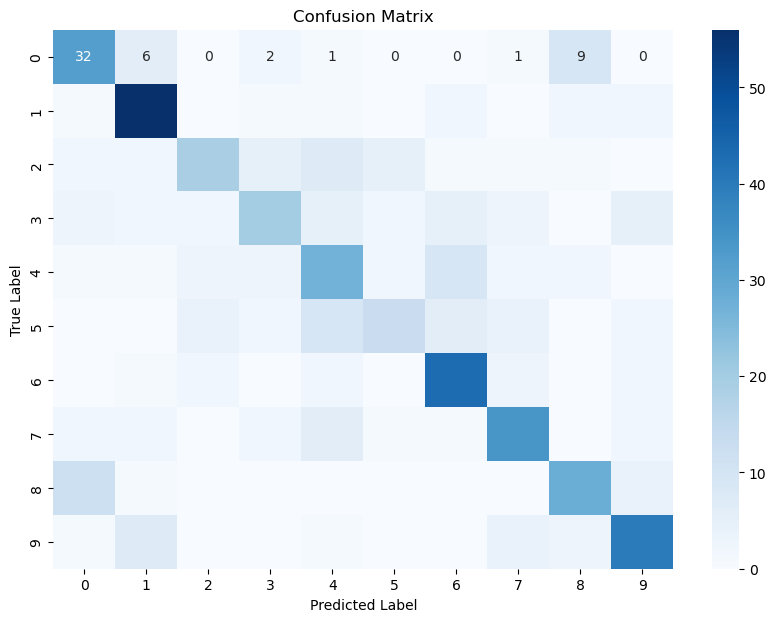

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# 繪製混淆矩陣的熱圖
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Exercise : try to encapsulate the confusion matrix functionality and utilize it to present the results of both training set and testing set

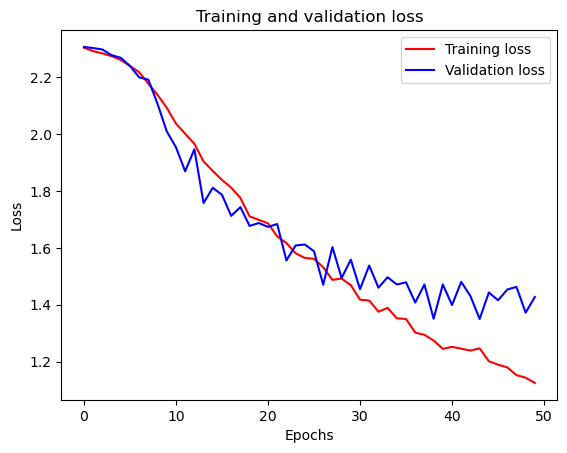

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [19]:
# 評估模型
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

1/1 [==============================] - 0s 69ms/step - loss: 1.4272 - accuracy: 0.4000
Test accuracy: 0.4000000059604645


In [20]:
y_pred = model.predict(x_test)
print(y_pred.shape)

# print(|y_pred)
y_pred_label = np.argmax(y_pred, axis=1)    
print('y_pred: ', y_pred_label)


1/1 [==============================] - 0s 53ms/step
(20, 10)
y_pred:  [6 8 1 8 4 6 1 4 3 1 8 9 4 1 1 8 6 3 8 4]


In [21]:
# 找出預測錯誤的索引
y_pred = model.predict(x_test)
print('y_shape: ', y_pred.shape)

y_pred_label = np.argmax(y_pred, axis=1)  # axis=1：沿著行查找每行的最大值的索引。axis=0：沿著列查找每列的最大值的索引。
y_test_label = np.argmax(y_test, axis=1)

print('y_pred: ', y_pred_label)
print('y_test: ', y_test_label)

len(x_test)
errors = np.where(y_pred_label != y_test_label)[0]
print(f'Index of Prediction errors:  {errors} ')
print(f'Total number of prediction errors: {len(errors)}')

1/1 [==============================] - 0s 50ms/step
y_shape:  (20, 10)
y_pred:  [6 8 1 8 4 6 1 4 3 1 8 9 4 1 1 8 6 3 8 4]
y_test:  [3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]
Index of Prediction errors:  [ 0  2  3  4  7 10 12 13 14 16 17 19] 
Total number of prediction errors: 12
